<h1 align="center">CAS Analysis</h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices

sns.set_theme()

## Importing data

In [3]:
df= pd.read_csv('Crash_Analysis_System_(CAS)_data.csv')
df.head()

,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,...,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
0,1772561.0,5896382.0,1,NaN,525420.0,0.0,NaN,0.0,1.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
1,1836757.0,5859311.0,3,NaN,534300.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Frost
2,1762088.0,5912507.0,4,NaN,519500.0,0.0,NaN,0.0,1.0,NaN,...,NaN,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Fine,Null
3,1753522.0,5911939.0,6,NaN,518902.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Light rain,Null
4,1761364.0,5914259.0,7,NaN,520202.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null


In [4]:
df.shape

(776878, 72)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776878 entries, 0 to 776877
Data columns (total 72 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   X                          776878 non-null  float64
 1   Y                          776878 non-null  float64
 2   OBJECTID                   776878 non-null  int64  
 3   advisorySpeed              29289 non-null   float64
 4   areaUnitID                 776762 non-null  float64
 5   bicycle                    776873 non-null  float64
 6   bridge                     310482 non-null  float64
 7   bus                        776873 non-null  float64
 8   carStationWagon            776873 non-null  float64
 9   cliffBank                  310482 non-null  float64
 10  crashDirectionDescription  776878 non-null  object 
 11  crashFinancialYear         776878 non-null  object 
 12  crashLocation1             776878 non-null  object 
 13  crashLocation2             77

In [6]:
null_columns = df.columns[df.isnull().any()]
(df[null_columns].isnull().sum()/len(df))*100

advisorySpeed                96.229910
areaUnitID                    0.014932
bicycle                       0.000644
bridge                       60.034652
bus                           0.000644
carStationWagon               0.000644
cliffBank                    60.034652
crashLocation2                0.118551
crashRoadSideRoad           100.000000
crashSHDescription            0.000129
debris                       60.034652
directionRoleDescription      0.010169
ditch                        60.034652
fatalCount                    0.017506
fence                        60.034652
guardRail                    60.034652
holiday                      94.547664
houseOrBuilding              60.034652
intersection                100.000000
kerb                         60.034652
meshblockId                   0.014932
minorInjuryCount              0.017506
moped                         0.000644
motorcycle                    0.000644
NumberOfLanes                 0.197586
objectThrownOrDropped    

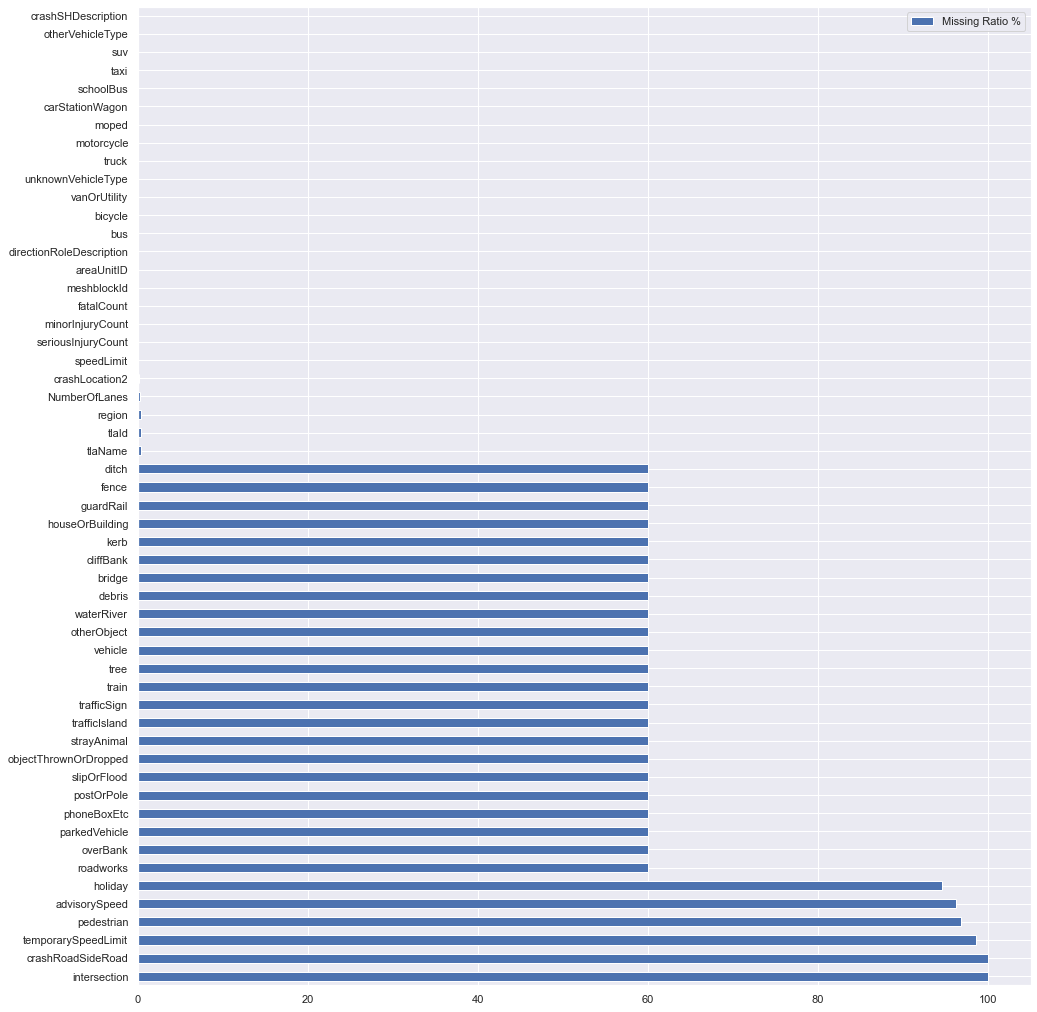

In [7]:
import matplotlib.pyplot as plt
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
        
plot_width, plot_height = (16,18)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
plot_nas(df)

## Speed

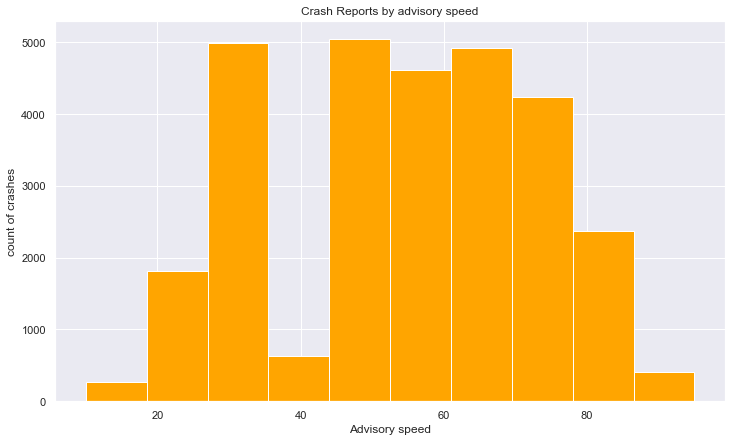

In [8]:
plt.figure(figsize=(12,7))
plt.hist(df['advisorySpeed'], label= 'Advisory Speed', color= 'orange')
plt.title('Crash Reports by advisory speed')
plt.xlabel('Advisory speed')
plt.ylabel('count of crashes')
plt.rc('axes', titlesize=18)

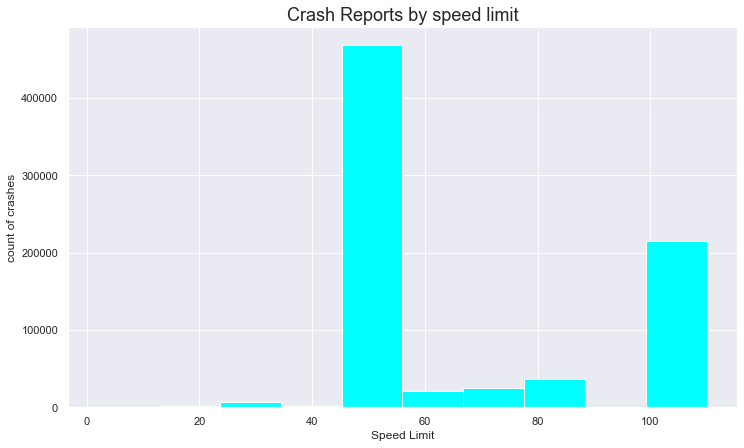

In [9]:
plt.figure(figsize=(12,7))
plt.hist(df['speedLimit'], label='Speed Limit', color = 'cyan')
plt.title('Crash Reports by speed limit')
plt.xlabel('Speed Limit')
plt.ylabel('count of crashes')
plt.show()

## All vehicles

In [10]:
df_vehicles = pd.DataFrame(df[['bicycle', 'bus', 'carStationWagon', 'moped', 'motorcycle', 'otherVehicleType', 'suv', 'schoolBus', 'taxi', 'train', 'truck', 'vanOrUtility', 'vehicle']])
df_vehicles.replace(np.NaN,0,inplace= True)
df_vehicles.head()

,bicycle,bus,carStationWagon,moped,motorcycle,otherVehicleType,suv,schoolBus,taxi,train,truck,vanOrUtility,vehicle
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


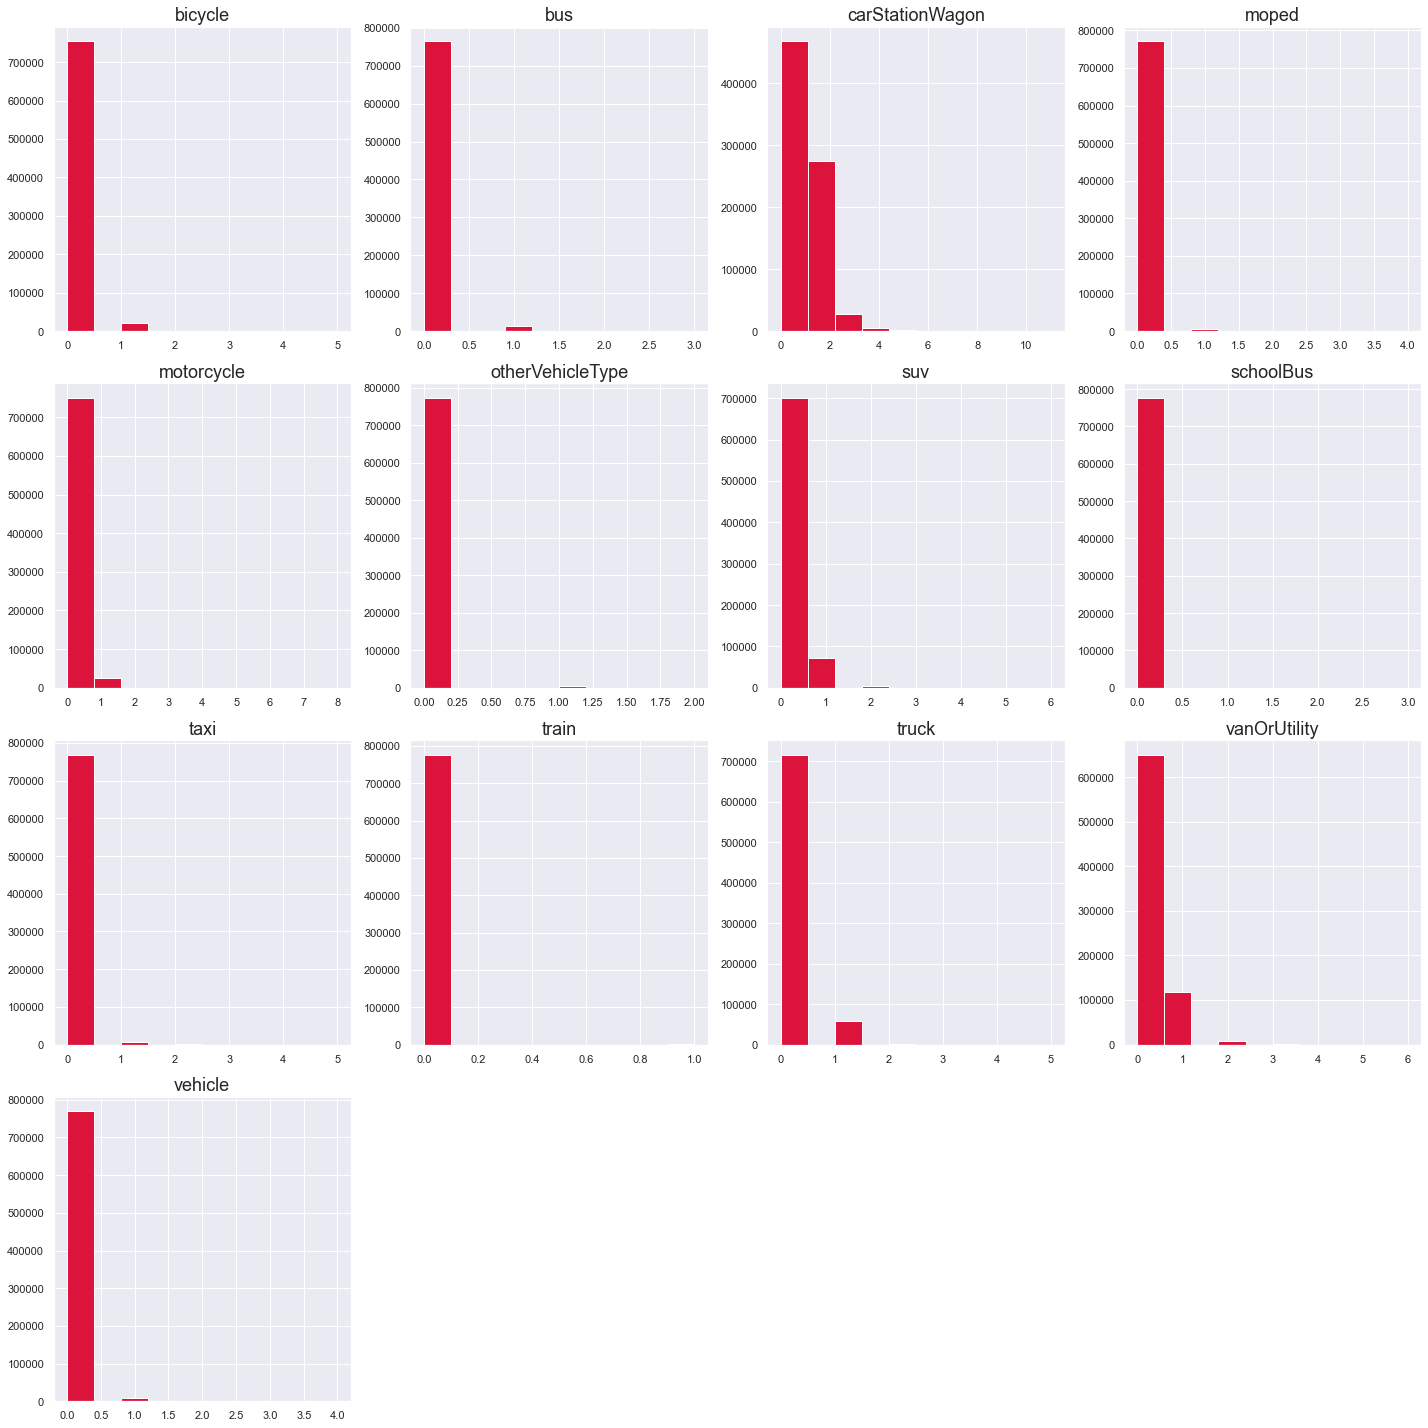

In [11]:
df_vehicles.hist(figsize=(20,20), color = 'crimson')
plt.tight_layout()
plt.rc('axes', titlesize=28)
plt.show()

## Weather

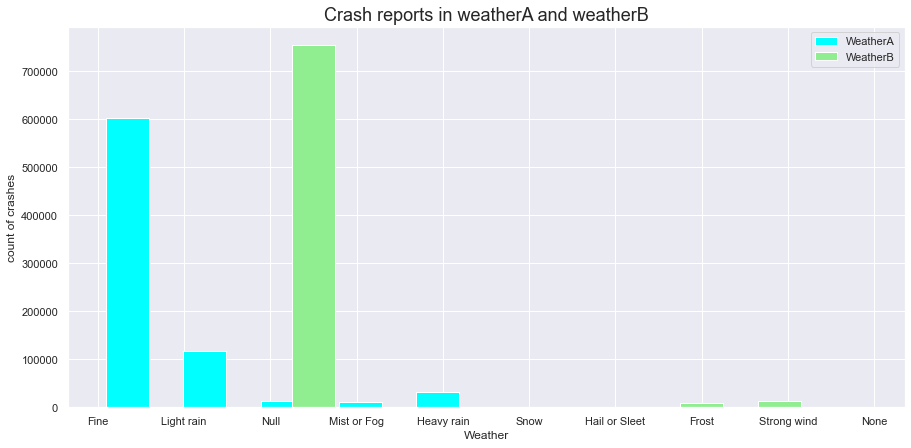

In [12]:
plt.rc('axes', titlesize=18)
plt.figure(figsize= (15,7))
plt.hist([df['weatherA'], df['weatherB']], label=['WeatherA', 'WeatherB'], color= ['cyan', 'lightgreen'], bins= 10, width= .5)
plt.title('Crash reports in weatherA and weatherB')
plt.xlabel('Weather')
plt.ylabel('count of crashes')
plt.legend()
plt.show()

## Light

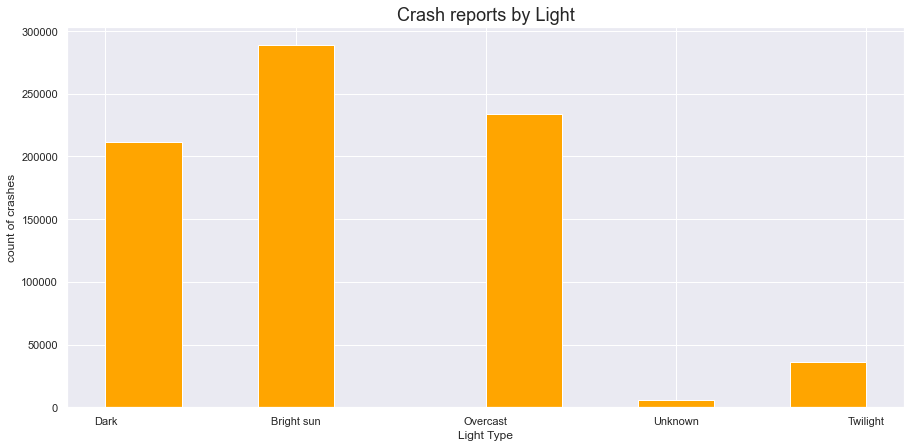

In [13]:
plt.figure(figsize= (15,7))
plt.hist(df.light, color= 'orange')
plt.xlabel('Light Type')
plt.ylabel('count of crashes')
plt.title('Crash reports by Light')
plt.show()

## Regions

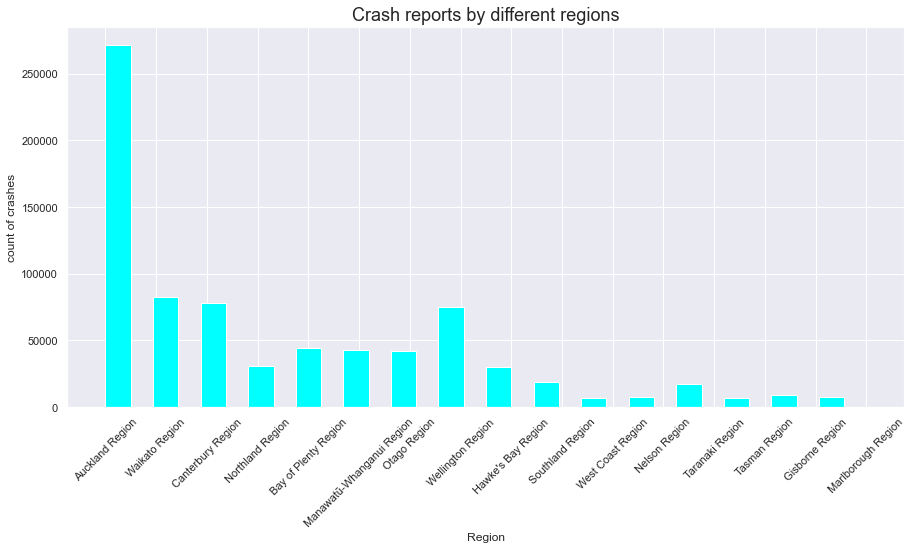

In [17]:
df_region = df.dropna(subset=['region'])

plt.figure(figsize= (15 ,7))
plt.hist(df_region['region'],bins= 16,width= .5, color= 'cyan')
plt.xticks(rotation = 45 )
plt.xlabel('Region')
plt.ylabel('count of crashes')
plt.title('Crash reports by different regions')
plt.show()

## TLA name

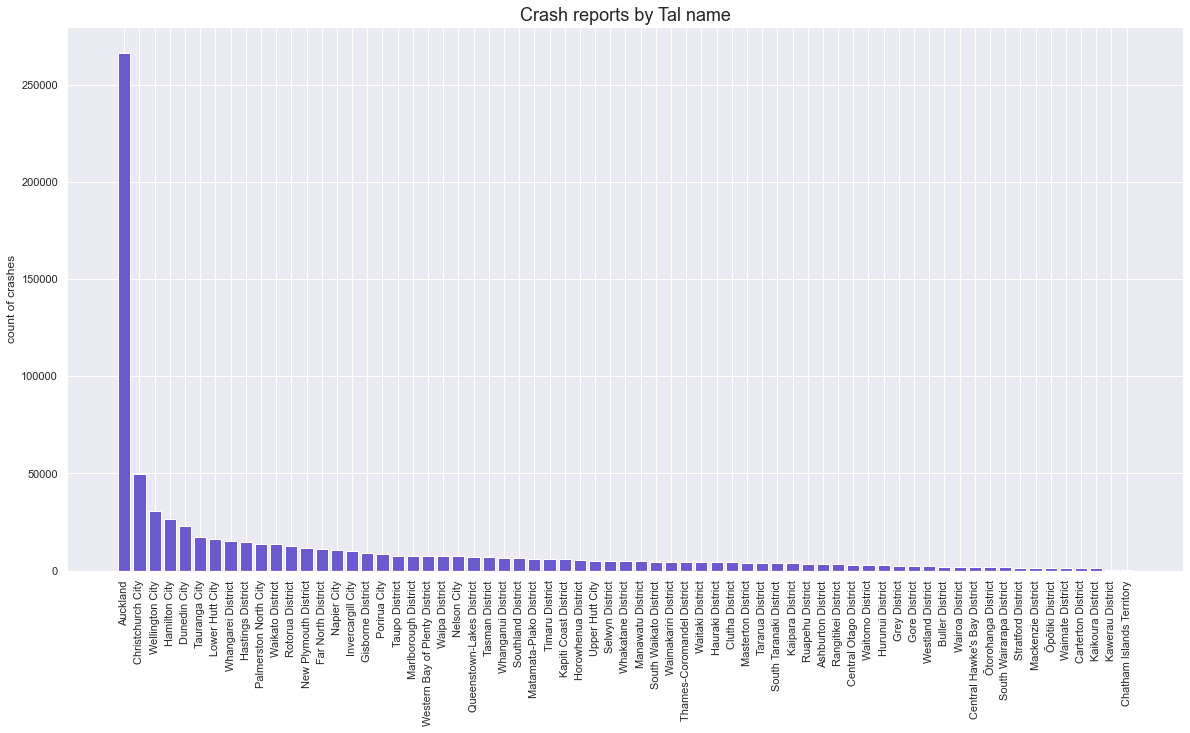

In [13]:
df_tn = df['tlaName'].value_counts()
plt.figure(figsize=(20,10))
plt.bar(df_tn.index, df_tn, color='slateblue')
plt.xticks(rotation= 90)
plt.ylabel('count of crashes')
plt.title('Crash reports by Tal name')
plt.show()

## Roads

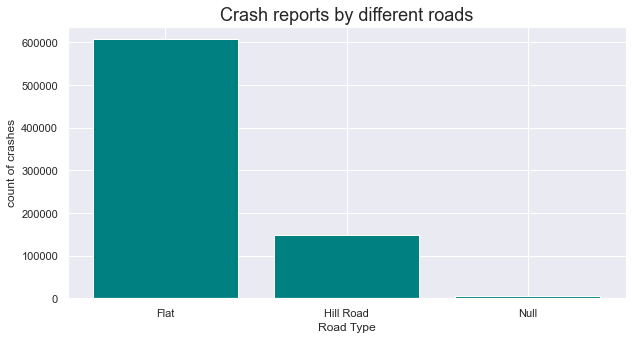

In [14]:
df_fh = df['flatHill'].value_counts()
plt.figure(figsize= (10 ,5))
plt.bar(df_fh.index,df_fh, color= 'teal')
plt.xlabel('Road Type')
plt.ylabel('count of crashes')
plt.title('Crash reports by different roads')
plt.show()

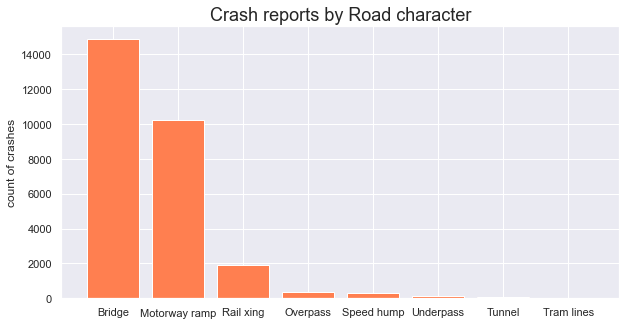

In [15]:
df_rc = df['roadCharacter'].value_counts().drop("Nil")
plt.figure(figsize= (10 ,5))
plt.bar(df_rc.index,df_rc, color= 'coral')
plt.ylabel('count of crashes')
plt.title('Crash reports by Road character')
plt.show()

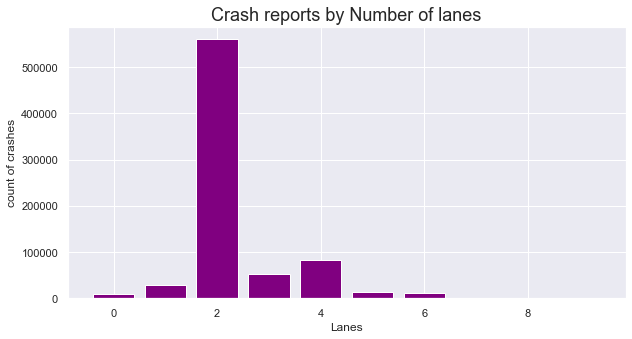

In [16]:
df_l = df['NumberOfLanes'].value_counts()
plt.figure(figsize= (10 ,5))
plt.bar(df_l.index,df_l, color= 'purple')
plt.xlabel('Lanes')
plt.ylabel('count of crashes')
plt.title('Crash reports by Number of lanes')
plt.show()

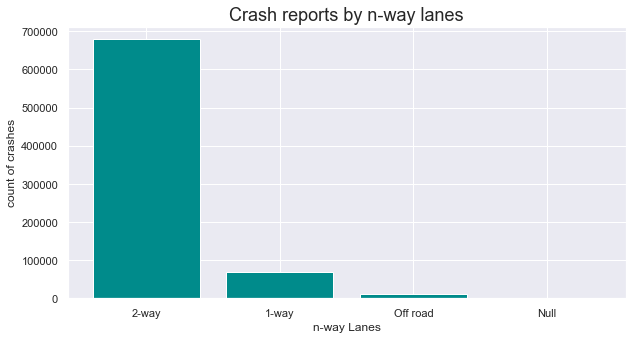

In [17]:
df_rl = df['roadLane'].value_counts()
plt.figure(figsize= (10 ,5))
plt.bar(df_rl.index,df_rl, color= 'darkcyan')
plt.xlabel('n-way Lanes')
plt.ylabel('count of crashes')
plt.title('Crash reports by n-way lanes')
plt.show()

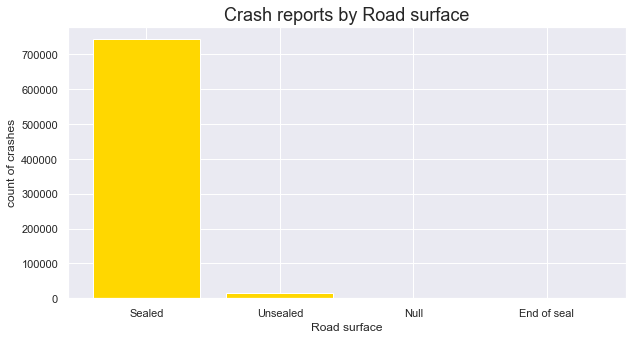

In [18]:
df_rs = df['roadSurface'].value_counts()
plt.figure(figsize= (10 ,5))
plt.bar(df_rs.index,df_rs, color= 'gold')
plt.xlabel('Road surface')
plt.ylabel('count of crashes')
plt.title('Crash reports by Road surface')
plt.show()

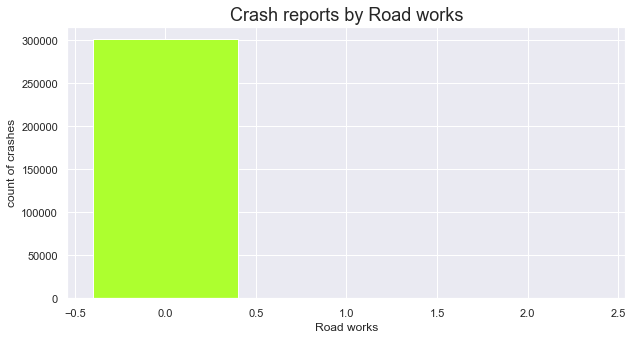

In [19]:
df_rw = df['roadworks'].value_counts()
plt.figure(figsize= (10 ,5))
plt.bar(df_rw.index,df_rw, color= 'greenyellow')
plt.xlabel('Road works')
plt.ylabel('count of crashes')
plt.title('Crash reports by Road works')
plt.show()

In [20]:
df_rw

0.0    300904
1.0       655
2.0        26
Name: roadworks, dtype: int64

## Crash severity

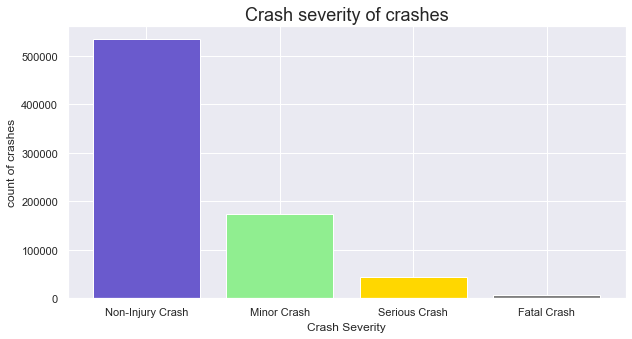

In [21]:
df_cs =df['crashSeverity'].value_counts()

plt.figure(figsize=(10,5))
plt.bar(df_cs.index,df_cs, color=['slateblue', 'lightgreen', 'gold', 'grey'])
plt.xlabel('Crash Severity')
plt.ylabel('count of crashes')
plt.title('Crash severity of crashes')
plt.show()

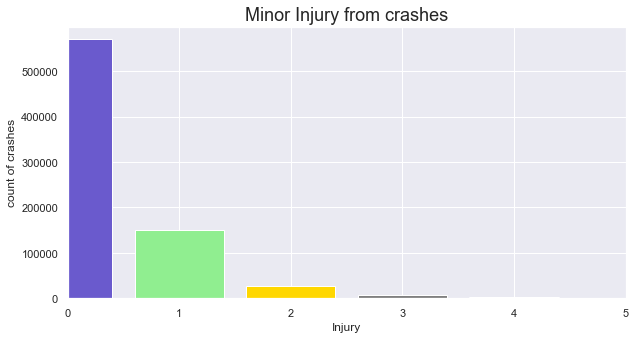

In [22]:
df_mi =df['minorInjuryCount'].value_counts()

plt.figure(figsize=(10,5))
plt.bar(df_mi.index,df_mi, color=['slateblue', 'lightgreen', 'gold', 'grey'])
plt.xlabel('Injury')
plt.ylabel('count of crashes')
plt.title('Minor Injury from crashes')
plt.xlim(0,5)
plt.show()

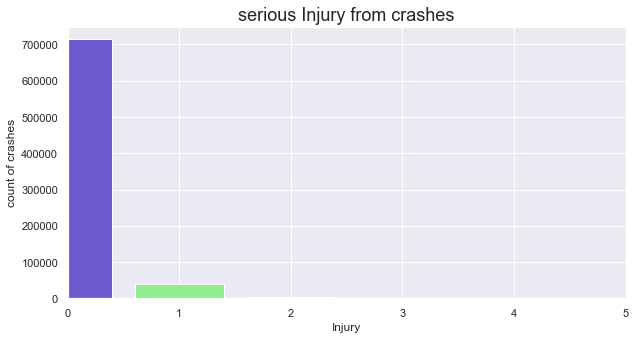

In [23]:
df_si =df['seriousInjuryCount'].value_counts()

plt.figure(figsize=(10,5))
plt.bar(df_si.index,df_si, color=['slateblue', 'lightgreen', 'gold', 'grey'])
plt.xlabel('Injury')
plt.ylabel('count of crashes')
plt.title('serious Injury from crashes')
plt.xlim(0,5)
plt.show()

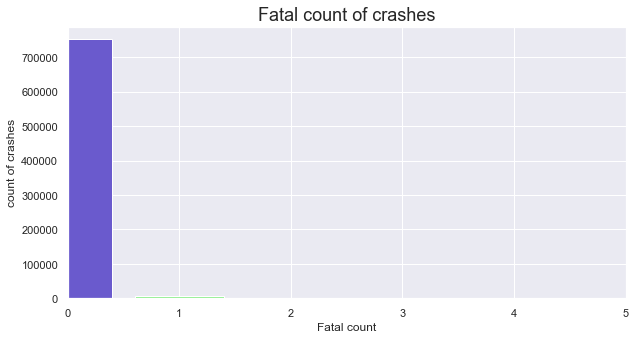

In [24]:
df_fc =df['fatalCount'].value_counts()

plt.figure(figsize=(10,5))
plt.bar(df_fc.index,df_fc, color=['slateblue', 'lightgreen', 'gold', 'grey'])
plt.xlabel('Fatal count')
plt.ylabel('count of crashes')
plt.title('Fatal count of crashes')
plt.xlim(0,5)
plt.show()

In [25]:
df_fc

0.0    751654
1.0      6284
2.0       524
3.0       109
4.0        37
5.0         6
6.0         3
9.0         1
7.0         1
8.0         1
Name: fatalCount, dtype: int64

## Crash Year

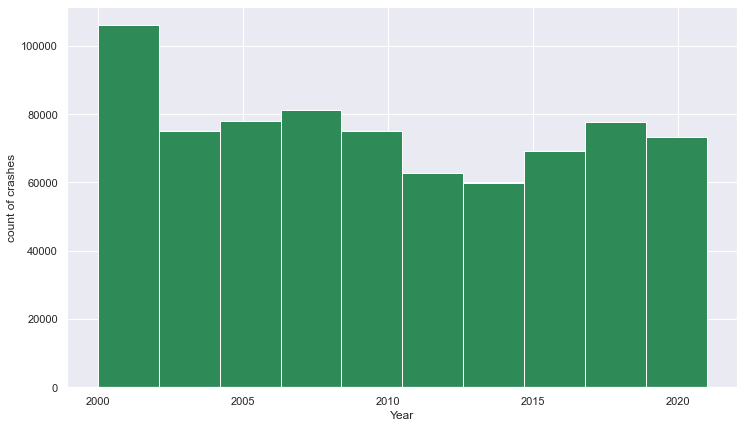

In [26]:
plt.figure(figsize=(12,7))
plt.hist(df['crashYear'],color=['seagreen'])
plt.xlabel('Year')
plt.ylabel('count of crashes')
plt.show()

## Crash Financial year

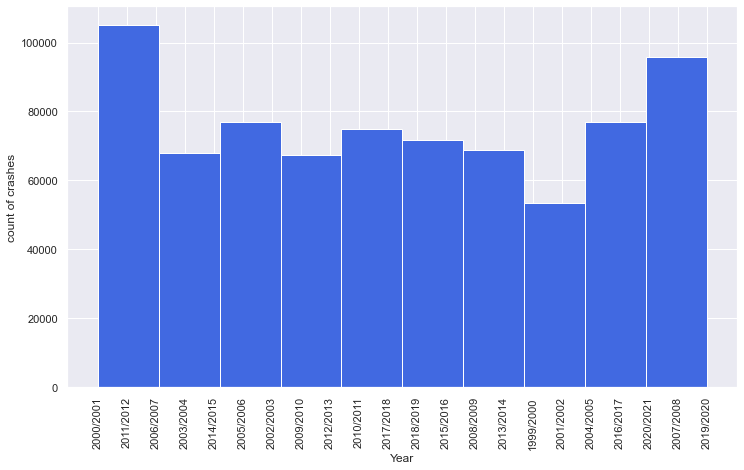

In [27]:
plt.figure(figsize=(12,7))
plt.hist(df['crashFinancialYear'],color= 'royalblue')
plt.xticks(rotation= 90)
plt.xlabel('Year')
plt.ylabel('count of crashes')
plt.show()

## Crash Direction Description

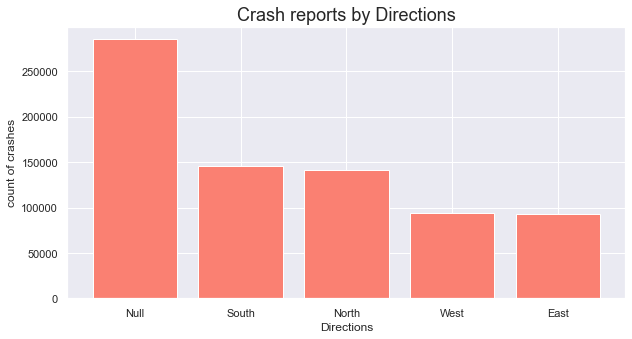

In [28]:
df_dr = df['crashDirectionDescription'].value_counts()
plt.figure(figsize= (10 ,5))
plt.bar(df_dr.index,df_dr, color= 'salmon')
plt.xlabel('Directions')
plt.ylabel('count of crashes')
plt.title('Crash reports by Directions')
plt.show()

## Crash Location

In [29]:
df_cl = df['crashLocation1'].value_counts()
df_cl1 = pd.DataFrame(df_cl)
df_cl1.reset_index(inplace=True)
df_cl1 = df_cl1[df_cl1['crashLocation1'] > 1000]
df_cl1.head()

,index,crashLocation1
0,SH 1N,54783
1,SH 2,20376
2,SH 1S,17588
3,SH 3,10679
4,SH 6,9752


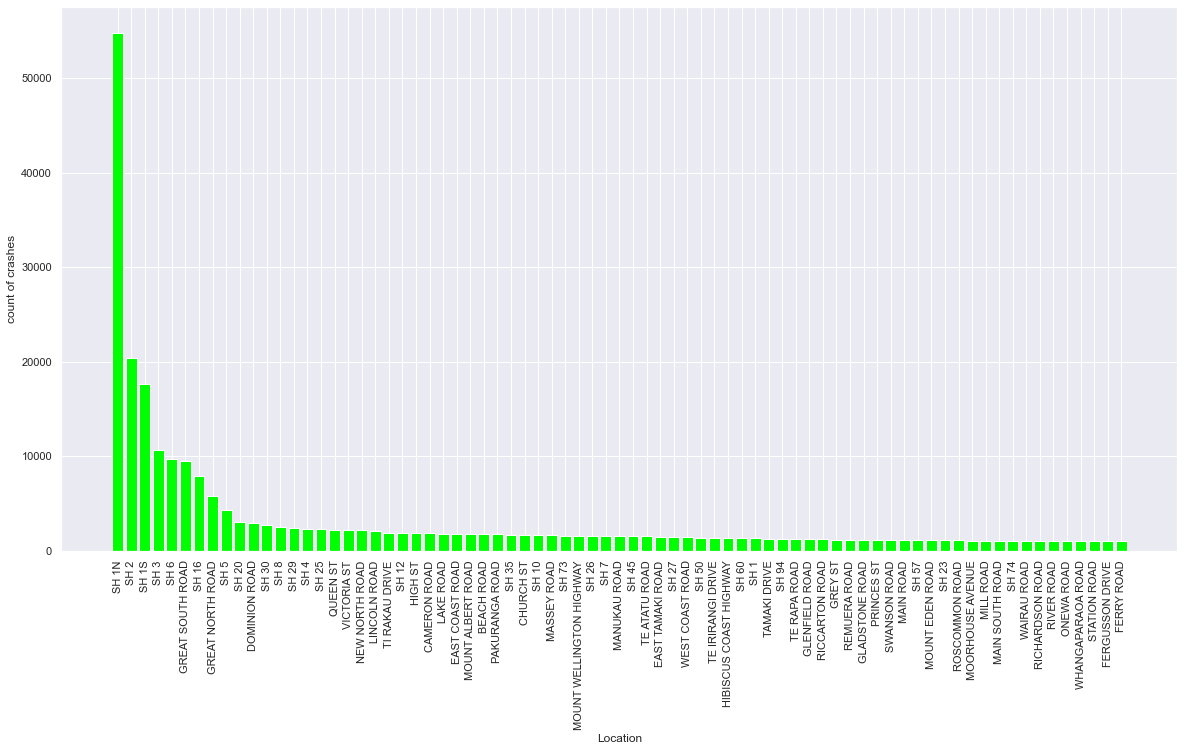

In [30]:
plt.figure(figsize=(20, 10))
plt.bar(df_cl1['index'], df_cl1['crashLocation1'] , color= 'lime')
plt.rc('xtick', labelsize= 10)
plt.xticks(rotation= 90)
plt.xlabel('Location')
plt.ylabel('count of crashes')
plt.show()

In [31]:
df_cl = df['crashLocation2'].value_counts()
df_cl2 = pd.DataFrame(df_cl)
df_cl2.reset_index(inplace=True)
df_cl2 = df_cl2[df_cl2['crashLocation2'] > 500]
df_cl2.head()

,index,crashLocation2
0,SH 1N,3765
1,GREAT SOUTH ROAD,3103
2,SH 2,2272
3,QUEEN ST,1772
4,SH 1S,1742


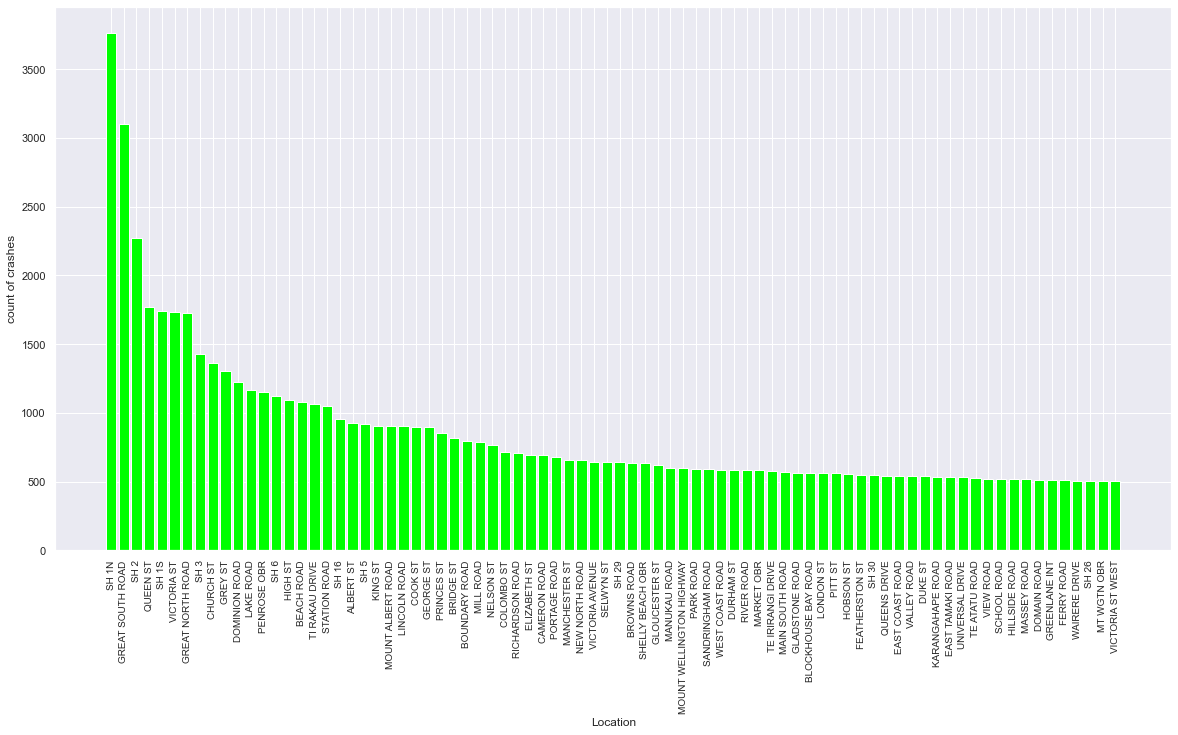

In [32]:
plt.figure(figsize=(20, 10))
plt.bar(df_cl2['index'], df_cl2['crashLocation2'] , color= 'lime')
plt.rc('xtick', labelsize= 10)
plt.xticks(rotation= 90)
plt.xlabel('Location')
plt.ylabel('count of crashes')
plt.show()

## Objects involved in Crash

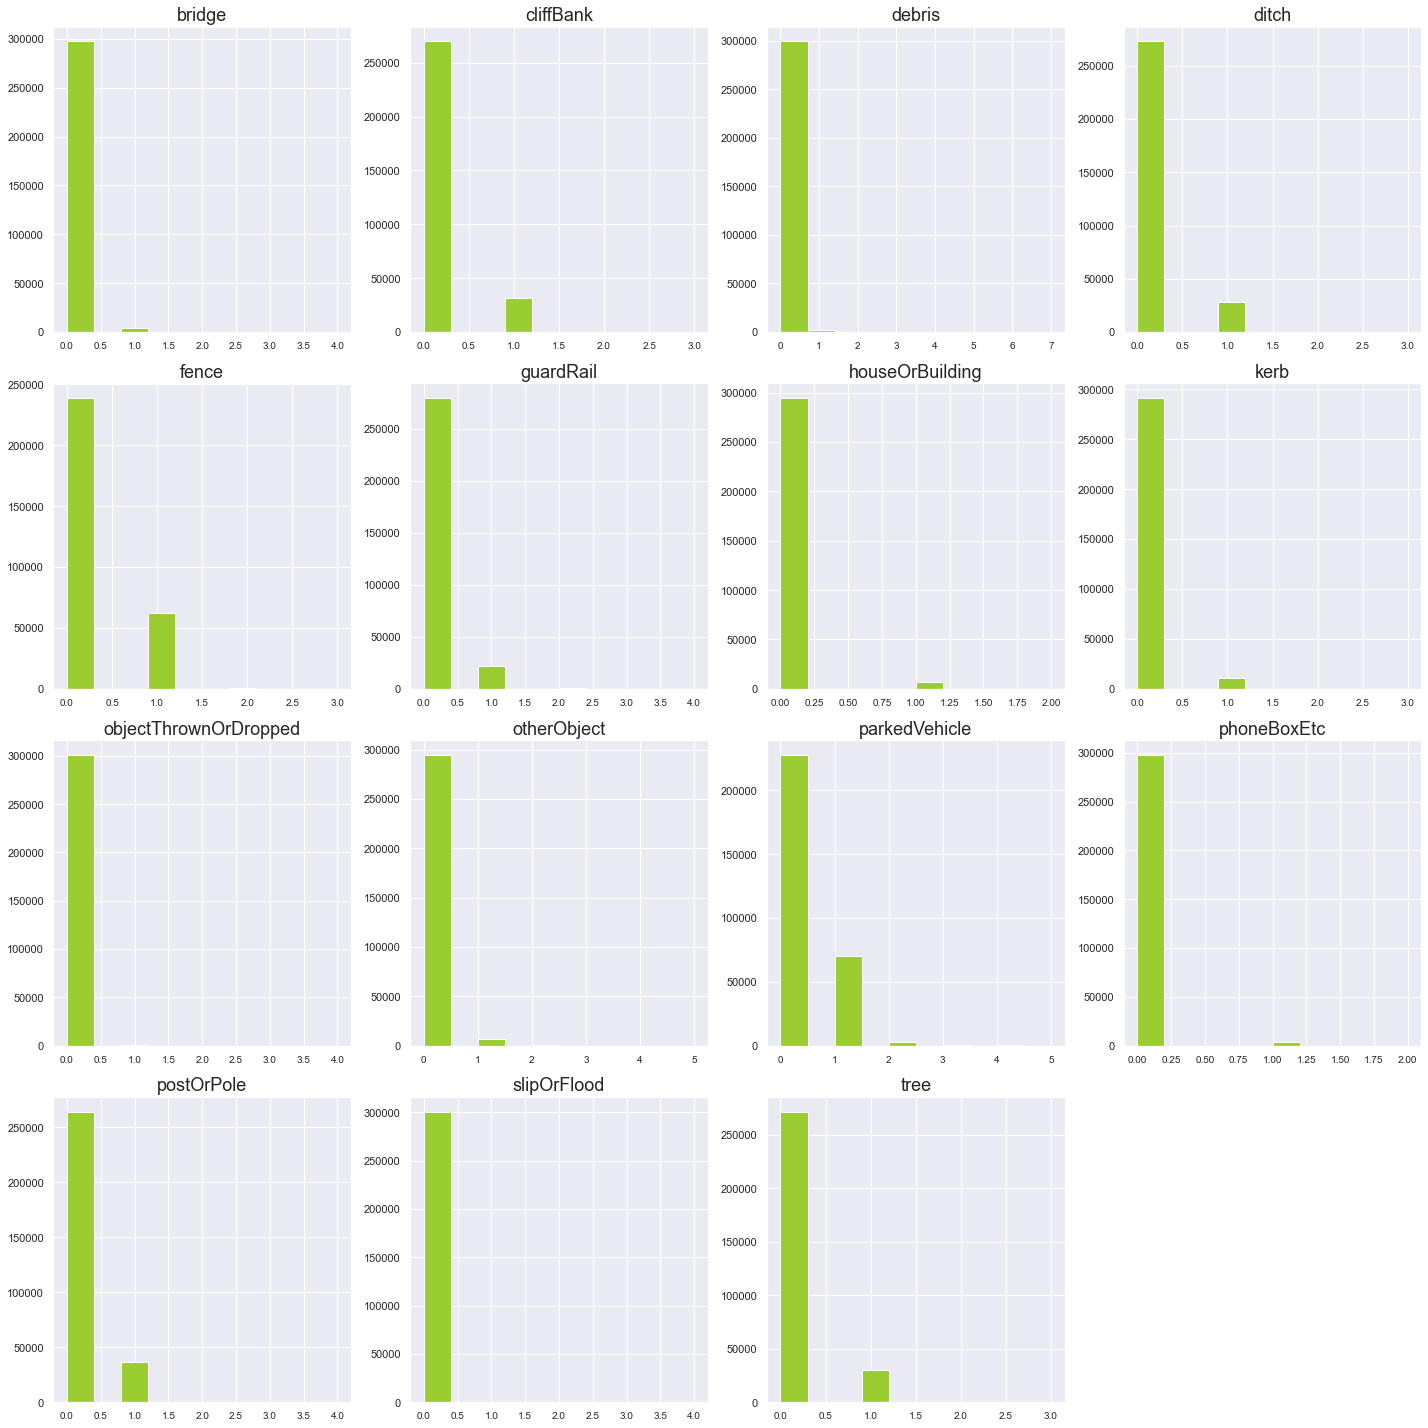

In [33]:
df_objects = df[['bridge', 'cliffBank' , 'debris', 'ditch', 'fence', 'guardRail',
              'houseOrBuilding', 'kerb' , 'objectThrownOrDropped',
              'otherObject', 'parkedVehicle', 'phoneBoxEtc', 'postOrPole', 
              'slipOrFlood', 'streetLight', 'tree']]

df_objects.hist(figsize=(20,20), color = 'yellowgreen')
plt.rc('axes', titlesize=28)
plt.tight_layout()
plt.show()

## Traffic 

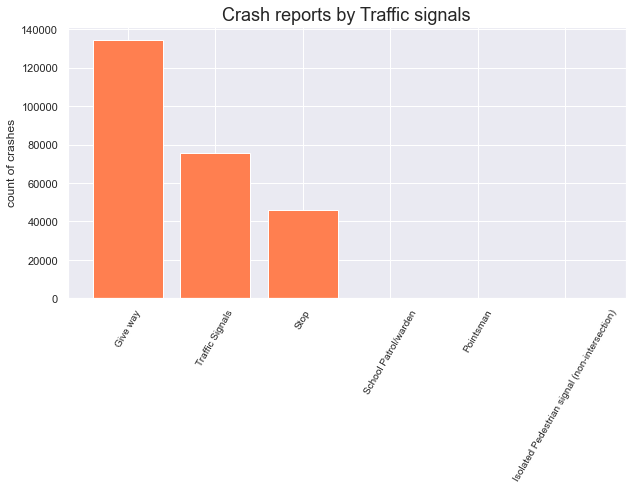

In [34]:
df_tc = df['trafficControl'].value_counts().drop(['Nil','Unknown'])
plt.figure(figsize= (10 ,5))
plt.rc('axes', titlesize=18)
plt.bar(df_tc.index,df_tc, color= 'coral')
plt.ylabel('count of crashes')
plt.xticks(rotation= 60)
plt.title('Crash reports by Traffic signals')
plt.show()

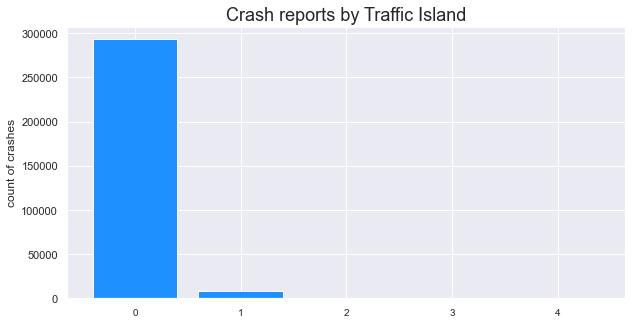

In [35]:
df_ti = df['trafficIsland'].value_counts()
plt.figure(figsize= (10 ,5))
plt.bar(df_ti.index,df_ti, color= 'dodgerblue')
plt.ylabel('count of crashes')
plt.title('Crash reports by Traffic Island')
plt.show()

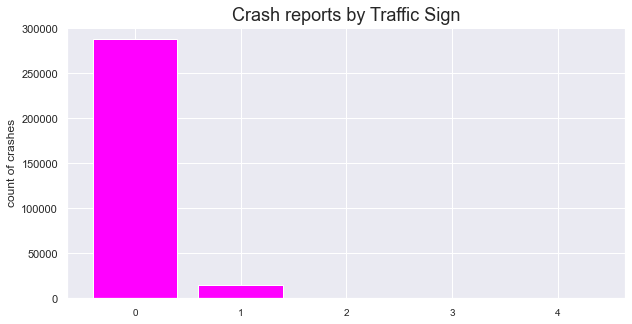

In [36]:
df_ts = df['trafficSign'].value_counts()
plt.figure(figsize= (10 ,5))
plt.bar(df_ts.index,df_ts, color= 'magenta')
plt.ylabel('count of crashes')
plt.title('Crash reports by Traffic Sign')
plt.show()

In [37]:
df_ts

0.0    287241
1.0     14261
2.0        81
4.0         2
Name: trafficSign, dtype: int64

## Pedestrians and animals

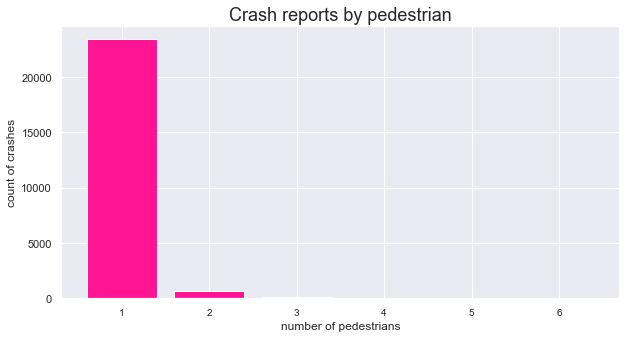

In [38]:
df_p = df['pedestrian'].value_counts()
plt.figure(figsize= (10 ,5))
plt.bar(df_p.index,df_p, color= 'deeppink')
plt.xlabel('number of pedestrians')
plt.ylabel('count of crashes')
plt.title('Crash reports by pedestrian')
plt.show()

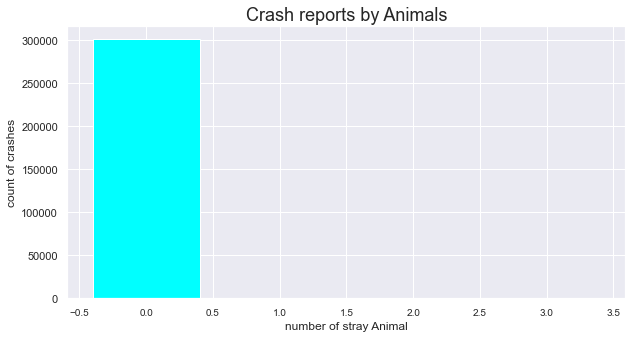

In [39]:
df_sa = df['strayAnimal'].value_counts()
plt.rc('axes', titlesize=18)
plt.figure(figsize= (10 ,5))
plt.bar(df_sa.index,df_sa, color= 'cyan')
plt.xlabel('number of stray Animal')
plt.ylabel('count of crashes')
plt.title('Crash reports by Animals')
plt.show()

## Water bodies and embankments 

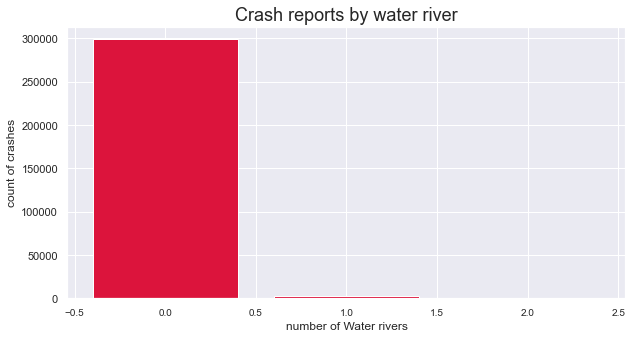

In [40]:
df_wr = df['waterRiver'].value_counts()
plt.figure(figsize= (10 ,5))
plt.bar(df_wr.index,df_wr, color= 'crimson')
plt.xlabel('number of Water rivers')
plt.ylabel('count of crashes')
plt.title('Crash reports by water river')
plt.show()

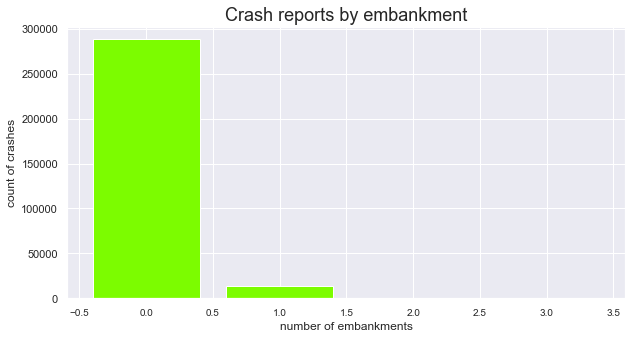

In [41]:
df_ob = df['overBank'].value_counts()
plt.figure(figsize= (10 ,5))
plt.bar(df_ob.index,df_ob, color= 'lawngreen')
plt.xlabel('number of embankments')
plt.ylabel('count of crashes')
plt.title('Crash reports by embankment')
plt.show()

## crash SH Description

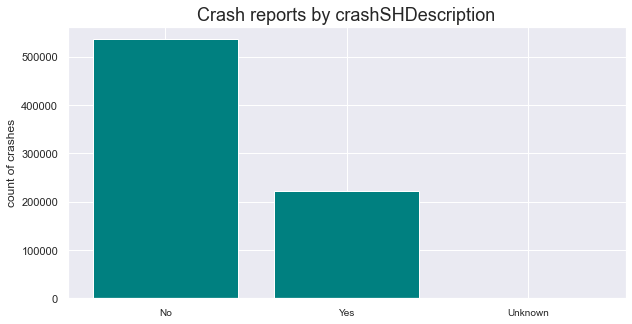

In [42]:
df_cd = df['crashSHDescription'].value_counts()
plt.figure(figsize= (10 ,5))
plt.bar(df_cd.index,df_cd, color= 'teal')
plt.ylabel('count of crashes')
plt.title('Crash reports by crashSHDescription')
plt.show()

## Direction Role Description

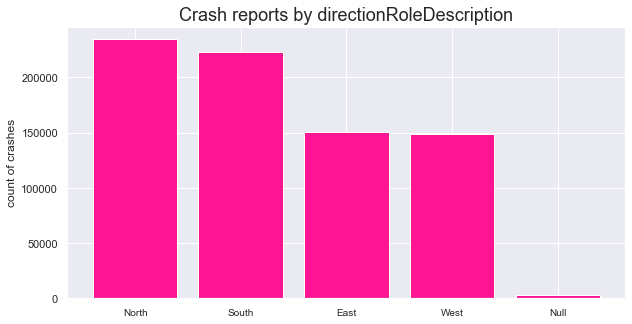

In [43]:
df_drd = df['directionRoleDescription'].value_counts()
plt.figure(figsize= (10 ,5))
plt.bar(df_drd.index,df_drd, color= 'deeppink')
plt.ylabel('count of crashes')
plt.title('Crash reports by directionRoleDescription')
plt.show()

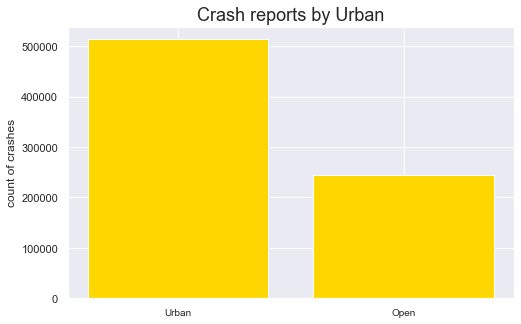

In [44]:
df_u = df['urban'].value_counts()
plt.figure(figsize= (8 ,5))
plt.bar(df_u.index,df_u, color= 'gold')
plt.ylabel('count of crashes')
plt.title('Crash reports by Urban')
plt.show()